# Deep Neural Network with Keras: Simple example 

In this example, we classify grayscale images (28 × 28 pixels) of handwritten digits into their 10 categories (0 through 9). We will use the infamous `mNIST` dataset. It's a set of 60,000 training images, plus 10,000 test images, along with all their lables. The set was assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 

As you will see in the code, training a neural network revolves around the following objects:
- Layers, which are combined into a network (or model)
- The input data and corresponding targets
- The loss function, which defines the feedback signal used for learning
- The optimizer, which determines how learning proceeds

We build the NN by stacking two `Dense` layers on top of each other.

**Reference**: Deep Learning with Python by FRANÇOIS CHOLLET

**Technical note **: run with Python 3.6 and on my MacBook Pro with macOS Mojave Version 10.14.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
# load mNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# check the size of the input data (images)
print('training inputs shape (samples, height, width):', train_images.shape)

training inputs shape (samples, height, width): (60000, 28, 28)


In [4]:
# check data type of input data
print(train_images.dtype)

uint8


In [5]:
# check the size of the target data (labels)
train_labels.shape

(60000,)

In [6]:
# verify that the number of samples is the same for both input and targets
assert len(train_labels) == train_images.shape[0]

In [7]:
# investigate the target data (should be lables of 0 to 9)
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# investigate the test inputs and target 
print('test inputs shape (samples, height, width):', test_images.shape)
print('what is inside test targets?')
test_labels

test inputs shape (samples, height, width): (10000, 28, 28)
what is inside test targets?


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

6


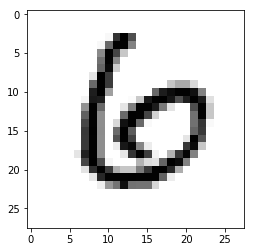

In [9]:
# Look at one of the test images
test_digit = test_images[11]
plt.imshow(test_digit, cmap=plt.cm.binary)
test_digit_label = test_labels[11] 
print(test_digit_label)

In [10]:
# setup the NN model archatecture
# (1) the layers are sequentially stacked on top of each other
network = models.Sequential()
# (2) first layer, fully connected, number of hidden units = 512
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# (3) last/output layer, fully connected, number of hidden units = 10
network.add(layers.Dense(10, activation='softmax'))
# (4) specifiy optimizer, loss function, & metrics to track during training
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
# preprocess the data by reshaping it into the shape the network expects
# and rescale so that all values are in the [0, 1] interval
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [12]:
# Notice that the input images are stored in Numpy tensors, which are 
# here formatted as float32 tensors of shape (60000, 784) (training data) 
# and (10000, 784) (test data), respectively.

In [13]:
# We also need to categorically encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
# fit the model, given the specified archatecture, to the training data
network.fit(train_images, train_labels, epochs=5, batch_size=128)
# Two quantities are displayed during training: the loss of the network 
# over the training data, and the accuracy of the network over the training data.

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2555 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.1048 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0688 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0496 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0376 - acc: 0.9885


In [15]:
# Check how well the model perfomrs on the test set
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)

10000/10000 [==============================] - 1s 57us/step
test accuracy: 0.9812
